In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [80]:
# Load dataset
df = pd.read_csv("sonardataset.csv")

In [81]:
df.shape

(208, 61)

In [82]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [83]:
#Class distribution
print(df["Y"].value_counts())

Y
M    111
R     97
Name: count, dtype: int64


In [84]:
df.isnull().sum().sum()

np.int64(0)

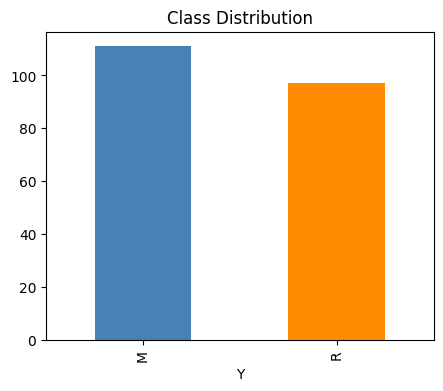

In [85]:
# Visualize classes
plt.figure(figsize=(5,4))
df["Y"].value_counts().plot(kind="bar", color=["steelblue", "darkorange"])
plt.title("Class Distribution")
plt.show()

In [86]:
# Separating features and target
X = df.drop("Y", axis=1)
y = df["Y"]

In [87]:
# Label encoding (M/R → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

In [88]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [89]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (166, 60)
Test shape: (42, 60)


### ANN Model

In [91]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(60,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5030 - loss: 0.6807 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5675 - loss: 0.6527 - val_accuracy: 0.6765 - val_loss: 0.6213
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.5841 - val_accuracy: 0.7059 - val_loss: 0.5818
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7010 - loss: 0.5449 - val_accuracy: 0.7353 - val_loss: 0.5636
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7794 - loss: 0.4671 - val_accuracy: 0.7353 - val_loss: 0.5460
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8129 - loss: 0.4393 - val_accuracy: 0.7353 - val_loss: 0.5313
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8544 - loss: 0.3886 - val_accuracy: 0.7353 - val_loss: 0.5105
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.3406 - val_accuracy: 0.7353 - val_loss: 0.4927

### Evaluation of Basic Model

In [92]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Basic Model Performance ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
=== Basic Model Performance ===
Accuracy: 0.8809523809523809
Precision: 0.8947368421052632
Recall: 0.85
F1 Score: 0.8717948717948718


### Loss & Accuracy Plots

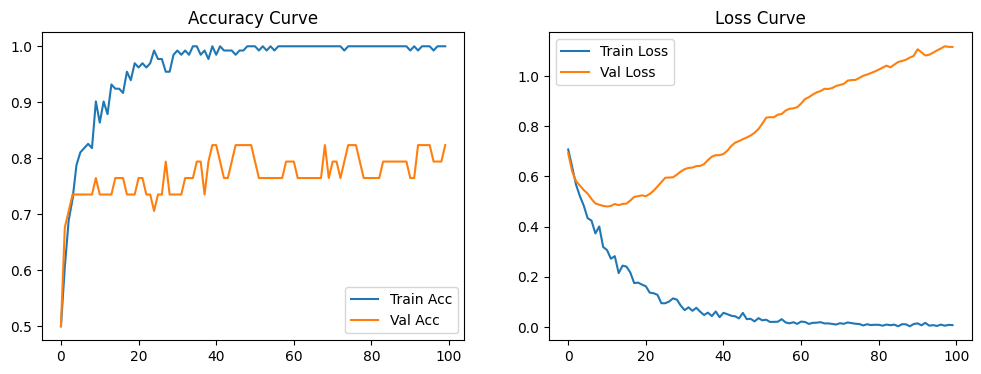

In [93]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()

### Confusion Matrix

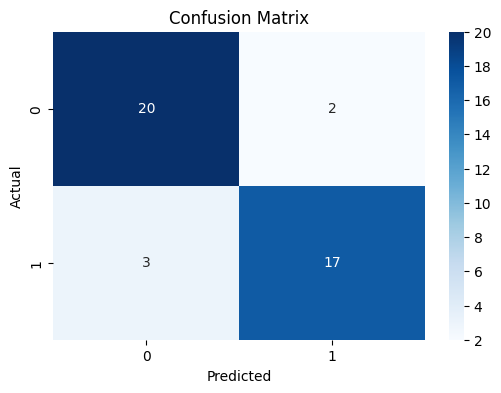

In [94]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Hyperparameter Tuning

In [95]:
def build_model(units1, units2, dropout):
    model = Sequential()
    model.add(Dense(units1, activation='relu', input_shape=(60,)))
    model.add(Dropout(dropout))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

configs = [
    (32, 16, 0.2),
    (64, 32, 0.3),
    (128, 64, 0.3)
]

best_f1 = 0
best_cfg = None

print("=== Hyperparameter Tuning Started ===\n")

for u1, u2, d in configs:
    print(f"Testing configuration: {u1}-{u2} (Dropout={d})")
    temp_model = build_model(u1, u2, d)
    temp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, verbose=0)
    pred = (temp_model.predict(X_test_scaled) > 0.5).astype(int)

    f1 = f1_score(y_test, pred)
    print("F1 Score:", f1, "\n")

    if f1 > best_f1:
        best_f1 = f1
        best_cfg = (u1, u2, d)

print("Best Configuration:", best_cfg)
print("Best F1 Score:", best_f1)


=== Hyperparameter Tuning Started ===

Testing configuration: 32-16 (Dropout=0.2)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
F1 Score: 0.7368421052631579 

Testing configuration: 64-32 (Dropout=0.3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
F1 Score: 0.8108108108108109 

Testing configuration: 128-64 (Dropout=0.3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
F1 Score: 0.8648648648648649 

Best Configuration: (128, 64, 0.3)
Best F1 Score: 0.8648648648648649


### Final Model Using Best Hyperparameters

In [96]:
u1, u2, d = best_cfg

final_model = build_model(u1, u2, d)

final_history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

final_pred = (final_model.predict(X_test_scaled) > 0.5).astype(int)

print("=== Final Tuned Model Performance ===")
print("Accuracy:", accuracy_score(y_test, final_pred))
print("Precision:", precision_score(y_test, final_pred))
print("Recall:", recall_score(y_test, final_pred))
print("F1 Score:", f1_score(y_test, final_pred))


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5224 - loss: 0.7516 - val_accuracy: 0.7059 - val_loss: 0.6061
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.5838 - val_accuracy: 0.7059 - val_loss: 0.5543
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7746 - loss: 0.4753 - val_accuracy: 0.7059 - val_loss: 0.5395
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8100 - loss: 0.4427 - val_accuracy: 0.6471 - val_loss: 0.5292
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8303 - loss: 0.4139 - val_accuracy: 0.6765 - val_loss: 0.5135
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8752 - loss: 0.3540 - val_accuracy: 0.6765 - val_loss: 0.5057
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3309 - val_accuracy: 0.6765 - val_loss: 0.4981
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8847 - loss: 0.3045 - val_accuracy: 0.7059 - val_loss: 0.4975

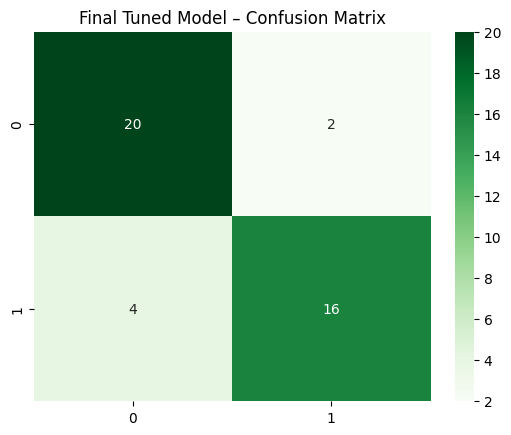

In [97]:
# Confusion Matrix
cm2 = confusion_matrix(y_test, final_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Final Tuned Model – Confusion Matrix")
plt.show()
